In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.notebook

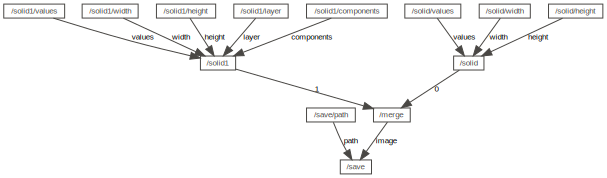

INFO:imagecat:Task /solid solid:
INFO:imagecat:  components: ['r', 'g', 'b']
INFO:imagecat:  layer: C
INFO:imagecat:  role: Role.RGB
INFO:imagecat:  size: [256 256]
INFO:imagecat:  values: [1.  0.5 0. ]
INFO:imagecat:  output: Image(C: Layer(256x256x3 float16 ['r', 'g', 'b'] Role.RGB))
INFO:imagecat:Task /solid1 solid:
INFO:imagecat:  components: []
INFO:imagecat:  layer: A
INFO:imagecat:  role: Role.RGB
INFO:imagecat:  size: [256 256]
INFO:imagecat:  values: [0.5]
INFO:imagecat:  output: Image(A: Layer(256x256x1 float16 [] Role.RGB))
INFO:imagecat:Task /merge merge:
INFO:imagecat:  output: Image(C: Layer(256x256x3 float16 ['r', 'g', 'b'] Role.RGB),A: Layer(256x256x1 float16 [] Role.RGB))



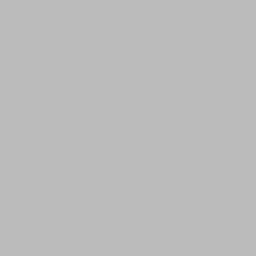
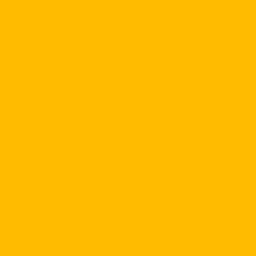

In [2]:
graph = graphcat.Graph()
imagecat.add_operation(graph, "/solid", imagecat.solid, values=(1, 0.5, 0), width=128, height=128)
imagecat.add_operation(graph, "/solid", imagecat.solid, values=(0.5,), width=128, height=128, layer="A", components=[])
imagecat.add_operation(graph, "/merge", imagecat.merge)
imagecat.add_operation(graph, "/save", imagecat.save, path="test.png")
graph.set_links("/solid", ("/merge", 0))
graph.set_links("/solid1", ("/merge", 1))
graph.set_links("/merge", ("/save", "image"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/merge"))

In [3]:
graph.update("/save")